In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import os, sys 
from google.colab import drive 
drive.mount('/content/gdrive')
default_dir = "/content/gdrive/My Drive/Colab Notebooks/kaggle"

train = pd.read_csv(os.path.join(default_dir,'train.csv'))
test = pd.read_csv(os.path.join(default_dir,'test.csv'))

Mounted at /content/gdrive


## Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info() #(10886, 12), count->종속 변수  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.info() #(6493,9), casual, registered 변수 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.isnull().sum() 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# EDA (일변수, 다변수)

In [ ]:
train  

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train.columns  

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#1. season
train.season.value_counts()  

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

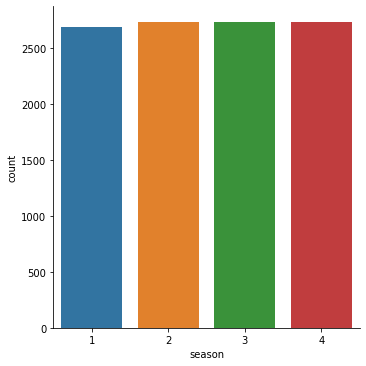

In [ ]:
sns.factorplot(x='season',data=train,kind='count') # 겨울이 가장 많고 봄이 가장 적지만 거의 비슷하다.  

In [ ]:
#2. holiday 
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

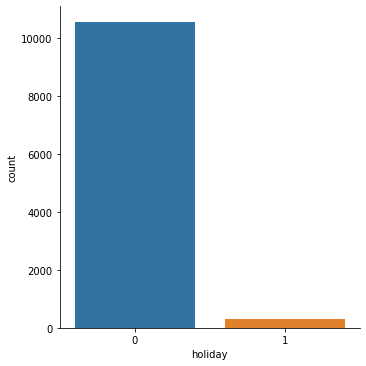

In [ ]:
sns.factorplot(x='holiday',data=train,kind='count') #공휴일(주말 포함x)이 아닌 날이 대다수이다.   

In [ ]:
#3. workingday  
train.workingday.value_counts() 

1    7412
0    3474
Name: workingday, dtype: int64

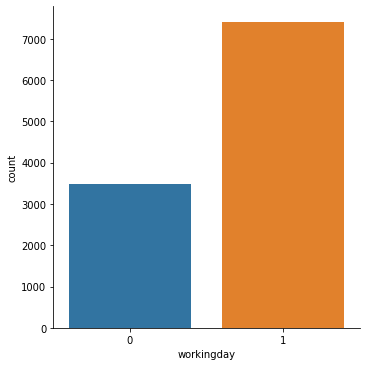

In [ ]:
sns.factorplot(x='workingday',data=train,kind='count') #주말인 날보다 평일인 날이 대략 2배 더 많다. 

In [ ]:
#3. weather
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

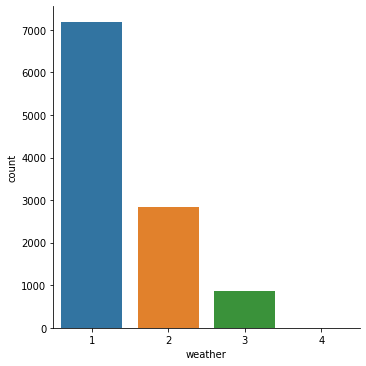

In [ ]:
sns.factorplot(x='weather',data=train,kind='count') #맑은 날(부분적으로 흐림)이 대다수이다. - 날이 좋지 않으면 대여수가 줄어든다. 

In [ ]:
#나머지 연속형 설명 변수 분포 파악 
train[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered']].describe() 

,temp,atemp,humidity,windspeed,casual,registered
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000


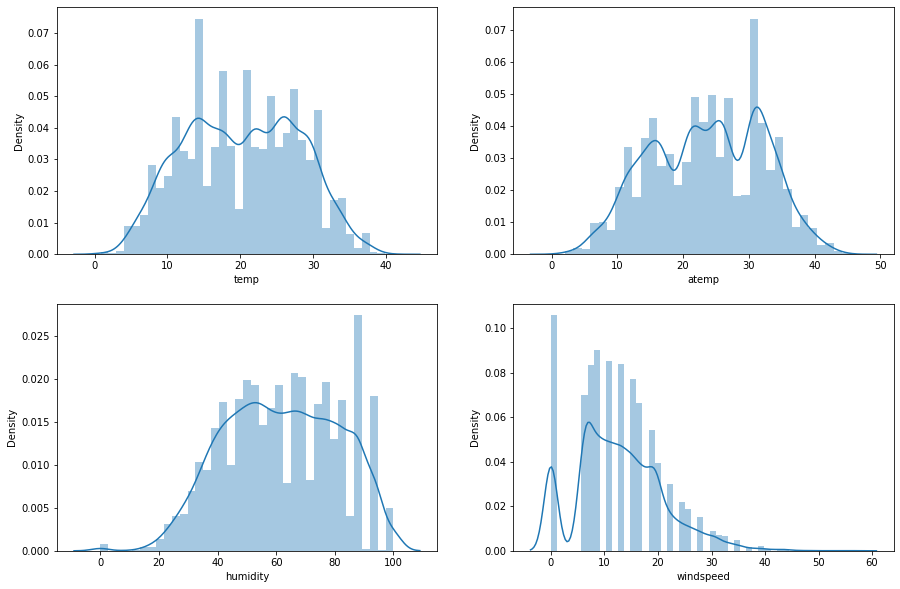

In [ ]:
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,2,1) 
ax1 = sns.distplot(train.temp)  
 
ax2 = fig.add_subplot(2,2,2) 
ax2 = sns.distplot(train.atemp)

ax3 = fig.add_subplot(2,2,3)  
ax3 = sns.distplot(train.humidity)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed)

In [ ]:
# 섭씨온도, 체감온도, 습기, 풍속 등 날씨에 관한 분포를 보면 대체로 선선~따뜻한 날이 많다.  

In [ ]:
#날짜 변수 전처리 함수 생성
def to_date(df, col):
  df['year']=pd.to_datetime(df[col]).dt.year
  df['month']=pd.to_datetime(df[col]).dt.month
  df['day']=pd.to_datetime(df[col]).dt.day
  df['hour']=pd.to_datetime(df[col]).dt.hour
  return df

In [ ]:
train=to_date(train, 'datetime') 

In [ ]:
train.drop(['datetime'],axis=1, inplace=True)

In [ ]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


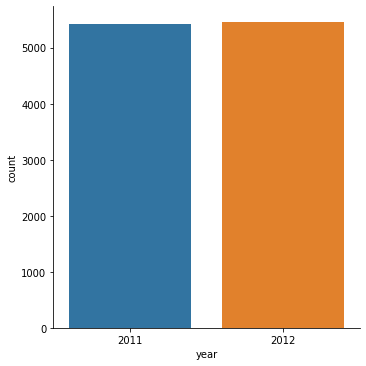

In [ ]:
#날짜 변수 분포 파악      
sns.factorplot(x='year',data=train,kind='count') #2012년도가 더 많지만 거의 비슷하다. 

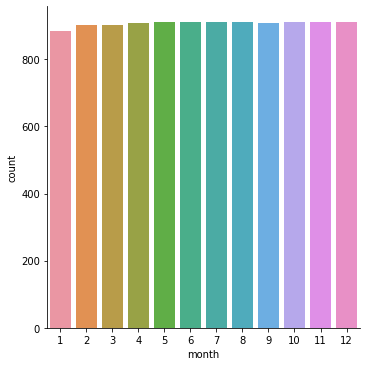

In [ ]:
sns.factorplot(x='month',data=train,kind='count')

In [ ]:
train['month'].value_counts() #1월 달이 가장 적다. 하지만 크게 차이가 나는 수준은 아니다.

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

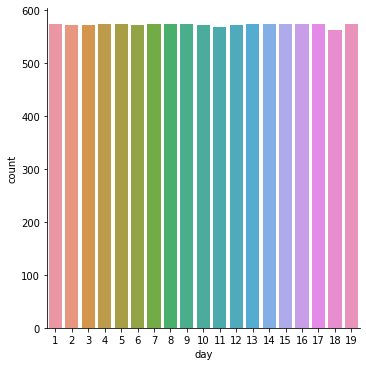

In [ ]:
sns.factorplot(x='day',data=train,kind='count')   

In [ ]:
train['day'].value_counts() #11일, 18일이 가장 적긴 하지만 크게 차이가 나는 정도는 아니다. 

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

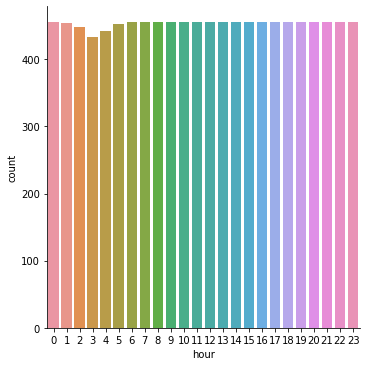

In [ ]:
sns.factorplot(x='hour',data=train,kind='count')   

In [ ]:
train['hour'].value_counts() #새벽 시간대가 가장 적다. 

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [ ]:
#fig = plt.figure(figsize=[15,10]) 
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())
       
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

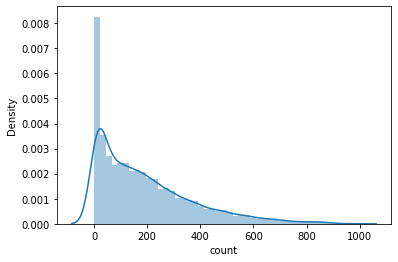

In [ ]:
# 종속 변수의 분포 파악   
sns.distplot(train['count']) #대부분 200회 미만이 많다, 왜도가 심하다 (로그 변환 필요)

In [ ]:
train['count'].describe()    

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

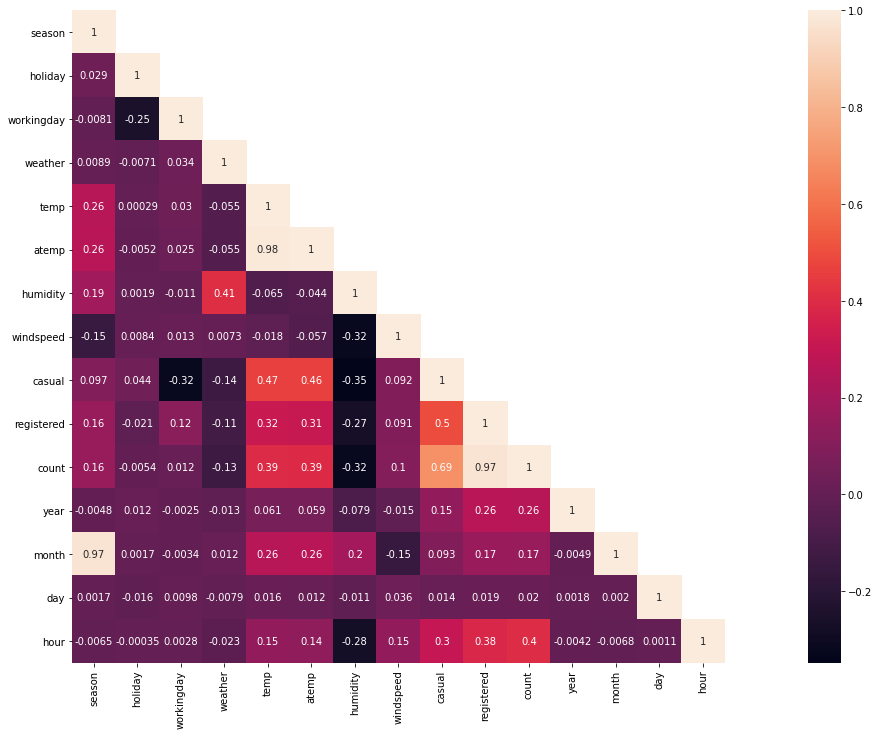

In [ ]:
# 상관관계 파악
cor_mat= train.corr() 
mask = np.array(cor_mat) 
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

1. count와의 상관관계
- registered, casual, temp, atemp, humidity
2. 다중공선성 (temp와 atemp 거의 같은 변수)
- (atemp,temp), (registered, casual), (temp,casual), (temp, registered) 
=> atemp, temp, casual, registered 
 

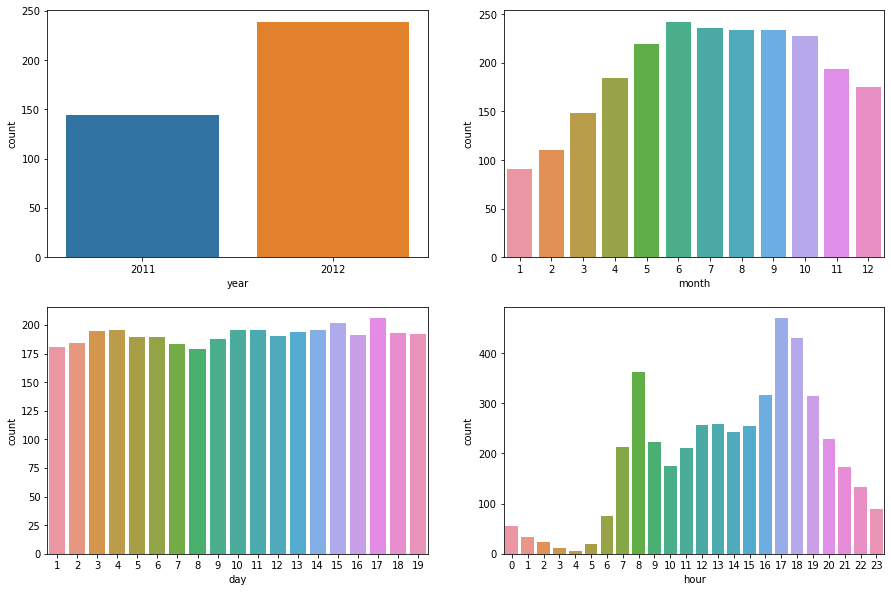

In [ ]:
#count와의 관계 
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,2,1) 
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

In [1]:
#2011년도보다 2012년도에, 6월달에, 상대적으로 오후에 더 많이 대여가 되었다. 

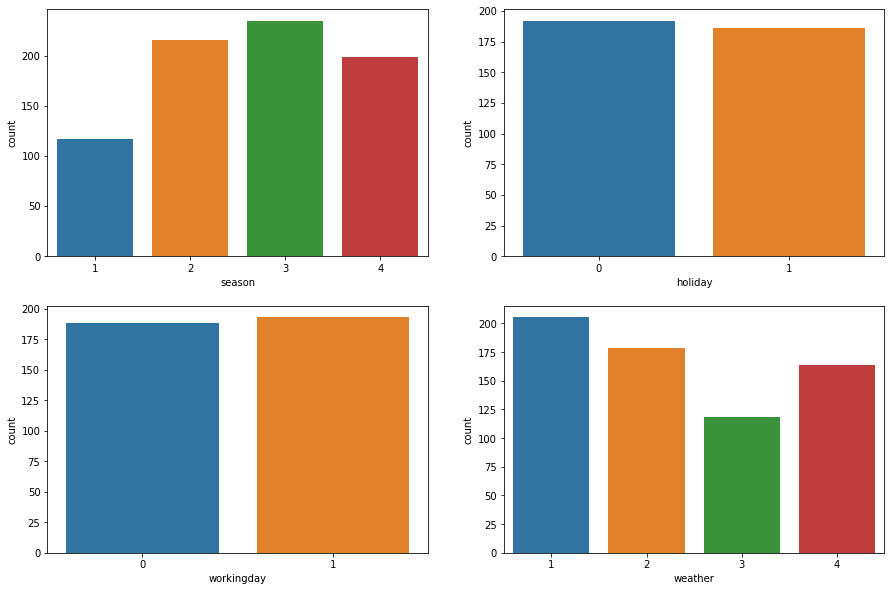

In [ ]:
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [ ]:
#여름, 가을, 날씨가 맑을 때 더 많이 대여했다. 

## preprocessing

In [ ]:
train = pd.read_csv(os.path.join(default_dir,'train.csv'))
test = pd.read_csv(os.path.join(default_dir,'test.csv'))
total=pd.concat([train,test],axis=0)

In [ ]:
total

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [ ]:
total=to_date(total, 'datetime')

In [ ]:
total.drop('datetime',axis=1,inplace=True)

In [ ]:
total.drop(['casual','registered'],axis=1, inplace=True)

In [ ]:
total

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1.0,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,NaN,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,NaN,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,NaN,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,NaN,2012,12,31,22


In [ ]:
#train, test 데이터 나누기 
train = total[pd.notnull(total['count'])] 
test = total[~pd.notnull(total['count'])]

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1.0,2011,1,1,4


In [ ]:
test.drop('count',axis=1, inplace=True) 

In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


# 모델 학습 및 평가

In [ ]:
#rmsle 평가 함수 
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true) #실제값 
        y_pred = np.exp(y_pred) #예측값  
        
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred) 
  
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output 

In [ ]:
X_train = train.drop('count', axis=1) 

In [ ]:
#Linear model
linear_reg_model = LinearRegression()

log_y = np.log1p(train['count']) 
linear_reg_model.fit(X_train, log_y) 

preds = linear_reg_model.predict(X_train)

print ('Linear Regression RMSLE:', rmsle(log_y, preds, True))

Linear Regression RMSLE: 0.9782101629911104


In [ ]:
#Ridge 회귀 
ridge_model = Ridge()

#하이퍼 파라미터 튜닝
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) 

#교차검증 
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,param_grid=ridge_params,scoring=rmsle_scorer,cv=5)

log_y = np.log1p(train['count']) 
gridsearch_ridge_model.fit(X_train, log_y)  
print('Best Parameter: ', gridsearch_ridge_model.best_params_) 

preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

print('Ridge Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter:  {'alpha': 0.1, 'max_iter': 3000}
Ridge Regression RMSLE: 0.978210139949526


In [ ]:
#라쏘 회귀
lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}  
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,param_grid=lasso_params,scoring=rmsle_scorer,cv=5)

log_y = np.log1p(train['count']) 
gridsearch_lasso_model.fit(X_train, log_y)  

print('Best Parameter:', gridsearch_lasso_model.best_params_)
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print('Lasso Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'alpha': 0.005, 'max_iter': 3000}
Lasso Regression RMSLE: 0.9783973439167822


In [ ]:
#선형회귀, 라쏘, 릿지 다 별로

In [ ]:
#랜덤 포레스트 
randomforest_model = RandomForestRegressor()  

rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,param_grid=rf_params,scoring=rmsle_scorer,cv=5)
 
log_y = np.log1p(train['count'])
gridsearch_random_forest_model.fit(X_train, log_y)

print('Best Parameter:', gridsearch_random_forest_model.best_params_)
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print('Random Forest Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'n_estimators': 140, 'random_state': 42}
Random Forest Regression RMSLE: 0.10967537467751562


In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [ ]:
#베스트 파라미터로 예측
randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(test)

In [ ]:
submission = pd.read_csv(os.path.join(default_dir,'sampleSubmission.csv')) 
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
submission['count'] = np.exp(randomforest_preds)
submission.to_csv(os.path.join(default_dir,'submission.csv'), index=False)